In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bpl-data/bowler.csv
/kaggle/input/bpl-data/batsman.csv
/kaggle/input/bpl-data/bpl.csv


# Load Datasets

In [2]:
bpl = pd.read_csv('../input/bpl-data/bpl.csv')
bowler = pd.read_csv('../input/bpl-data/bowler.csv')
batsman = pd.read_csv('../input/bpl-data/batsman.csv')

In [3]:
bpl.head()

,id,season,match_no,date,team_1,team_1_score,team_2,team_2_score,player_of_match,toss_winner,toss_decision,winner,venue,city,win_by_wickets,win_by_runs,result,umpire_1,umpire_2
0,0,2011/12,Final,Feb 29 2012,Barisal Burners,140/7,Dhaka Gladiators,144/2,Imran Nazir,Dhaka Gladiators,field first,Dhaka,"Shere Bangla National Stadium, Mirpur",Mirpur,8,0,8 wickets,David Orchard,Enamul Haque
1,30,2011/12,3rd,Feb 11 2012,Khulna Royal Bengals,175/5,Dhaka Gladiators,156/7,Andre Russell,Khulna Royal Bengals,bat first,Khulna,"Shere Bangla National Stadium, Mirpur",Mirpur,0,19,19 runs,Jeremy Lloyds,Sharfuddoula
2,26,2011/12,7th,Feb 13 2012,Barisal Burners,125,Khulna Royal Bengals,131/3,Dwayne Smith,Khulna Royal Bengals,field first,Khulna,"Shere Bangla National Stadium, Mirpur",Mirpur,7,0,7 wickets,Enamul Haque,Jeremy Lloyds
3,29,2011/12,4th,Feb 11 2012,Barisal Burners,180/2,Duronto Rajshahi,158/9,Ahmed Shehzad,Barisal Burners,bat first,Barisal,"Shere Bangla National Stadium, Mirpur",Mirpur,0,22,22 runs,David Orchard,Gazi Sohel
4,28,2011/12,5th,Feb 12 2012,Khulna Royal Bengals,171/3,Chittagong Kings,174/4,Nasir Jamshed,Khulna Royal Bengals,bat first,Chittagong,"Shere Bangla National Stadium, Mirpur",Mirpur,6,0,6 wickets,David Orchard,Enamul Haque


In [4]:
bowler.head()

,id,season,match_no,date,player_name,O,M,R,W,ECON,WD,NB
0,0,2011/12,Final,Feb 29 2012,Mashrafe Mortaza,2.0,0,17,0,8.50,0,0
1,0,2011/12,Final,Feb 29 2012,Azhar Mahmood,2.0,0,25,0,12.50,0,1
2,32,2011/12,1st,Feb 10 2012,Yasir Arafat,4.0,0,33,2,8.25,2,0
3,29,2011/12,4th,Feb 11 2012,Syed Rasel,3.0,0,33,0,11.00,2,0
4,28,2011/12,5th,Feb 12 2012,Dwayne Bravo,4.0,0,34,1,8.50,3,1


In [5]:
batsman.head()

,id,season,match_no,date,player_name,comment,R,B,M,fours,sixs,SR
0,31,2011/12,2nd,Feb 10 2012,Tamim Iqbal,c Samuels b Mohammad Sami,3,7,10,0,0,42.85
1,31,2011/12,2nd,Feb 10 2012,Jahurul Islam,c †Mushfiqur Rahim b Ervine,11,13,21,0,1,84.61
2,0,2011/12,Final,Feb 29 2012,Ahmed Shehzad,NaN,28,20,21,3,1,140.00
3,30,2011/12,3rd,Feb 11 2012,Shivnarine Chanderpaul,b Azhar Mahmood,19,15,24,2,1,126.66
4,29,2011/12,4th,Feb 11 2012,Ahmed Shehzad,c Syed Rasel b Abdul Razzaq,67,40,62,4,6,167.50


In [6]:
bpl.shape

(311, 19)

In [7]:
bowler.shape

(3601, 12)

In [8]:
batsman.shape

(5048, 12)

In [9]:
bpl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               311 non-null    int64 
 1   season           311 non-null    object
 2   match_no         311 non-null    object
 3   date             311 non-null    object
 4   team_1           311 non-null    object
 5   team_1_score     311 non-null    object
 6   team_2           311 non-null    object
 7   team_2_score     311 non-null    object
 8   player_of_match  311 non-null    object
 9   toss_winner      311 non-null    object
 10  toss_decision    311 non-null    object
 11  winner           311 non-null    object
 12  venue            311 non-null    object
 13  city             311 non-null    object
 14  win_by_wickets   311 non-null    int64 
 15  win_by_runs      311 non-null    int64 
 16  result           311 non-null    object
 17  umpire_1         311 non-null    ob

In [10]:
bowler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601 entries, 0 to 3600
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           3601 non-null   int64  
 1   season       3601 non-null   object 
 2   match_no     3601 non-null   object 
 3   date         3601 non-null   object 
 4   player_name  3601 non-null   object 
 5   O            3601 non-null   float64
 6   M            3601 non-null   int64  
 7   R            3601 non-null   int64  
 8   W            3601 non-null   int64  
 9   ECON         3601 non-null   float64
 10  WD           3601 non-null   int64  
 11  NB           3601 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 337.7+ KB


In [11]:
batsman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048 entries, 0 to 5047
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           5048 non-null   int64 
 1   season       5048 non-null   object
 2   match_no     5048 non-null   object
 3   date         5048 non-null   object
 4   player_name  5048 non-null   object
 5   comment      2254 non-null   object
 6   R            5048 non-null   object
 7   B            5048 non-null   object
 8   M            5048 non-null   object
 9   fours        5048 non-null   object
 10  sixs         5048 non-null   object
 11  SR           5048 non-null   object
dtypes: int64(1), object(11)
memory usage: 473.4+ KB


In [12]:
bpl.describe()

,id,win_by_wickets,win_by_runs
count,311.000000,311.000000,311.000000
mean,284.755627,3.186495,15.627010
std,228.051532,3.449723,24.626548
min,0.000000,0.000000,0.000000
25%,57.500000,0.000000,0.000000
50%,230.000000,2.000000,0.000000
75%,513.500000,6.000000,23.000000
max,719.000000,10.000000,119.000000


In [13]:
bowler.describe()

,id,O,M,R,W,ECON,WD,NB
count,3601.00000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000
mean,282.93835,3.160233,0.037212,23.827270,0.990558,7.883838,0.590947,0.071924
std,227.61957,1.014769,0.190769,10.011113,1.024923,3.183889,0.895431,0.294567
min,0.00000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.00000,2.300000,0.000000,17.000000,0.000000,5.750000,0.000000,0.000000
50%,230.00000,4.000000,0.000000,23.000000,1.000000,7.500000,0.000000,0.000000
75%,513.00000,4.000000,0.000000,30.000000,2.000000,9.500000,1.000000,0.000000
max,719.00000,4.000000,2.000000,60.000000,6.000000,27.000000,7.000000,3.000000


In [14]:
batsman.describe()

,id
count,5048.000000
mean,283.641244
std,228.449500
min,0.000000
25%,56.000000
50%,229.000000
75%,514.000000
max,719.000000


# **Data Cleaning and Processing**

In [15]:
bpl['team_1'].value_counts()

Chittagong Vikings        28
Dhaka Dynamites           28
Rangpur Riders            27
Khulna Titans             24
Comilla Victorians        23
Rajshahi Kings            16
Dhaka Gladiators          15
Sylhet Sixers             15
Khulna Royal Bengals      14
Barisal Bulls             14
Chattogram Challengers    13
Chittagong Kings          12
Barisal Burners           11
Duronto Rajshahi          10
Sylhet Royals             10
Sylhet Thunder             9
Dhaka Platoon              9
Rangpur Rangers            6
Khulna Tigers              6
Rajshahi Royals            5
Cumilla Warriors           4
Fortune Barishal           4
Minister Group Dhaka       3
Sylhet Sunrisers           3
Sylhet Super Stars         2
Name: team_1, dtype: int64

In [16]:
bpl['team_2'].value_counts()

Rangpur Riders            38
Comilla Victorians        34
Dhaka Dynamites           24
Rajshahi Kings            23
Chittagong Vikings        19
Khulna Titans             14
Duronto Rajshahi          14
Khulna Tigers             14
Chittagong Kings          13
Barisal Burners           13
Sylhet Royals             13
Dhaka Gladiators          11
Rajshahi Royals           10
Barisal Bulls             10
Chattogram Challengers     9
Khulna Royal Bengals       8
Sylhet Sixers              8
Sylhet Super Stars         8
Cumilla Warriors           8
Rangpur Rangers            6
Dhaka Platoon              4
Sylhet Thunder             3
Minister Group Dhaka       3
Fortune Barishal           2
Sylhet Sunrisers           2
Name: team_2, dtype: int64

In [17]:
bpl['winner'].value_counts()

Victorians     37
Riders         35
Dynamites      30
Dhaka          21
Royals         21
Kings          18
Vikings        17
Titans         16
Chittagong     13
Challengers    12
Rajshahi       12
Bulls          12
Tigers         12
Barisal        11
Sixers          9
Khulna          8
Platoon         7
Rangers         5
Warriors        4
Barishal        4
Super           3
Match           2
Thunder         1
Sunrisers       1
Name: winner, dtype: int64

In [18]:
bpl['toss_winner'].value_counts()

Rangpur Riders            34
Comilla Victorians        27
Dhaka Dynamites           25
Rajshahi Kings            22
Khulna Titans             21
Chittagong Vikings        21
Dhaka Gladiators          15
Barisal Burners           13
Khulna Tigers             13
Khulna Royal Bengals      12
Sylhet Royals             12
Sylhet Sixers             11
Barisal Bulls             11
Duronto Rajshahi          11
Chittagong Kings          10
Rajshahi Royals            9
Chattogram Challengers     8
Cumilla Warriors           8
Rangpur Rangers            6
Sylhet Super Stars         5
Sylhet Thunder             5
Fortune Barishal           4
Dhaka Platoon              3
Minister Group Dhaka       3
Sylhet Sunrisers           2
Name: toss_winner, dtype: int64

In [19]:
bpl[bpl['winner'] == 'Tied']

,id,season,match_no,date,team_1,team_1_score,team_2,team_2_score,player_of_match,toss_winner,toss_decision,winner,venue,city,win_by_wickets,win_by_runs,result,umpire_1,umpire_2


In [20]:
# Match means is Tied
bpl['winner'].replace('', 'NaN', inplace = True)

In [21]:
bpl[bpl['winner'] == 'NaN']

,id,season,match_no,date,team_1,team_1_score,team_2,team_2_score,player_of_match,toss_winner,toss_decision,winner,venue,city,win_by_wickets,win_by_runs,result,umpire_1,umpire_2


# **Team name convert in their own division**

In [22]:
all_teams = {
    "Dhaka": ['Dhaka Dynamites', 'Dhaka Platoon', 'Minister Group Dhaka', 'Dhaka Gladiators'], 
    "Chittagong": ['Chattogram Challengers', 'Chittagong Vikings', 'Chittagong Kings'],
    "Barishal": ['Fortune Barishal', 'Barisal Burners', 'Barisal', 'Barishal', 'Barisal Bulls'],
    "Sylhet": ['Sylhet Sunrisers', 'Sylhet Royals', 'Sylhet Sixers', 'Sylhet Super Stars', 'Sylhet Thunder'],
    "Rajshahi": ['Rajshahi Kings', 'Rajshahi Royals', 'Duronto Rajshahi'],
    "Comilla": ['Comilla Victorians', 'Cumilla Warriors'],
    "Khulna": ['Khulna Titans', 'Khulna Royal Bengals', 'Khulna Tigers'],
    "Rangpur": ['Rangpur Rangers', 'Rangpur Riders']    
}

for k, v in all_teams.items():
    for name in v:
        bpl['team_1'].replace(name, k, inplace = True)
        bpl['team_2'].replace(name, k, inplace = True)
        bpl['toss_winner'].replace(name, k, inplace = True)
        # winner ...
        for n in name.split(' '):
            bpl['winner'].replace(n, k, inplace = True)

In [23]:
bpl['team_1'].value_counts()

Dhaka         55
Chittagong    53
Khulna        44
Sylhet        39
Rangpur       33
Rajshahi      31
Barishal      29
Comilla       27
Name: team_1, dtype: int64

In [24]:
bpl['team_2'].value_counts()

Rajshahi      47
Rangpur       44
Dhaka         42
Comilla       42
Chittagong    41
Khulna        36
Sylhet        34
Barishal      25
Name: team_2, dtype: int64

In [25]:
bpl['toss_winner'].value_counts()

Dhaka         46
Khulna        46
Rajshahi      42
Rangpur       40
Chittagong    39
Sylhet        35
Comilla       35
Barishal      28
Name: toss_winner, dtype: int64

In [26]:
bpl['winner'].value_counts()

Chittagong    60
Dhaka         58
Comilla       41
Rangpur       40
Khulna        36
Sylhet        35
Barishal      27
Rajshahi      12
Match          2
Name: winner, dtype: int64

In [27]:
bpl.head()

,id,season,match_no,date,team_1,team_1_score,team_2,team_2_score,player_of_match,toss_winner,toss_decision,winner,venue,city,win_by_wickets,win_by_runs,result,umpire_1,umpire_2
0,0,2011/12,Final,Feb 29 2012,Barishal,140/7,Dhaka,144/2,Imran Nazir,Dhaka,field first,Dhaka,"Shere Bangla National Stadium, Mirpur",Mirpur,8,0,8 wickets,David Orchard,Enamul Haque
1,30,2011/12,3rd,Feb 11 2012,Khulna,175/5,Dhaka,156/7,Andre Russell,Khulna,bat first,Khulna,"Shere Bangla National Stadium, Mirpur",Mirpur,0,19,19 runs,Jeremy Lloyds,Sharfuddoula
2,26,2011/12,7th,Feb 13 2012,Barishal,125,Khulna,131/3,Dwayne Smith,Khulna,field first,Khulna,"Shere Bangla National Stadium, Mirpur",Mirpur,7,0,7 wickets,Enamul Haque,Jeremy Lloyds
3,29,2011/12,4th,Feb 11 2012,Barishal,180/2,Rajshahi,158/9,Ahmed Shehzad,Barishal,bat first,Barishal,"Shere Bangla National Stadium, Mirpur",Mirpur,0,22,22 runs,David Orchard,Gazi Sohel
4,28,2011/12,5th,Feb 12 2012,Khulna,171/3,Chittagong,174/4,Nasir Jamshed,Khulna,bat first,Chittagong,"Shere Bangla National Stadium, Mirpur",Mirpur,6,0,6 wickets,David Orchard,Enamul Haque


In [28]:
bpl[['team_1_run','team_1_wicket']] = bpl.team_1_score.str.split('/',expand=True)
bpl["team_1_wicket"].fillna(0, inplace = True)
bpl['team_1_wicket'] = pd.to_numeric(bpl['team_1_wicket'])
bpl['team_1_run'] = pd.to_numeric(bpl['team_1_run'])


bpl[['team_2_run','team_2_wicket']] = bpl.team_2_score.str.split('/',expand=True)
bpl["team_2_wicket"].fillna(0, inplace = True)
bpl['team_2_wicket'] = pd.to_numeric(bpl['team_2_wicket'])
bpl['team_2_run'] = pd.to_numeric(bpl['team_2_run'])

bpl.head()

,id,season,match_no,date,team_1,team_1_score,team_2,team_2_score,player_of_match,toss_winner,...,city,win_by_wickets,win_by_runs,result,umpire_1,umpire_2,team_1_run,team_1_wicket,team_2_run,team_2_wicket
0,0,2011/12,Final,Feb 29 2012,Barishal,140/7,Dhaka,144/2,Imran Nazir,Dhaka,...,Mirpur,8,0,8 wickets,David Orchard,Enamul Haque,140,7,144,2
1,30,2011/12,3rd,Feb 11 2012,Khulna,175/5,Dhaka,156/7,Andre Russell,Khulna,...,Mirpur,0,19,19 runs,Jeremy Lloyds,Sharfuddoula,175,5,156,7
2,26,2011/12,7th,Feb 13 2012,Barishal,125,Khulna,131/3,Dwayne Smith,Khulna,...,Mirpur,7,0,7 wickets,Enamul Haque,Jeremy Lloyds,125,0,131,3
3,29,2011/12,4th,Feb 11 2012,Barishal,180/2,Rajshahi,158/9,Ahmed Shehzad,Barishal,...,Mirpur,0,22,22 runs,David Orchard,Gazi Sohel,180,2,158,9
4,28,2011/12,5th,Feb 12 2012,Khulna,171/3,Chittagong,174/4,Nasir Jamshed,Khulna,...,Mirpur,6,0,6 wickets,David Orchard,Enamul Haque,171,3,174,4


In [29]:
bpl.drop('team_1_score', axis = 1, inplace = True)
bpl.drop('team_2_score', axis = 1, inplace = True)

## **Exploratory Data Analysis**

## **BPL Dataset**

In [30]:
bpl.head()

,id,season,match_no,date,team_1,team_2,player_of_match,toss_winner,toss_decision,winner,...,city,win_by_wickets,win_by_runs,result,umpire_1,umpire_2,team_1_run,team_1_wicket,team_2_run,team_2_wicket
0,0,2011/12,Final,Feb 29 2012,Barishal,Dhaka,Imran Nazir,Dhaka,field first,Dhaka,...,Mirpur,8,0,8 wickets,David Orchard,Enamul Haque,140,7,144,2
1,30,2011/12,3rd,Feb 11 2012,Khulna,Dhaka,Andre Russell,Khulna,bat first,Khulna,...,Mirpur,0,19,19 runs,Jeremy Lloyds,Sharfuddoula,175,5,156,7
2,26,2011/12,7th,Feb 13 2012,Barishal,Khulna,Dwayne Smith,Khulna,field first,Khulna,...,Mirpur,7,0,7 wickets,Enamul Haque,Jeremy Lloyds,125,0,131,3
3,29,2011/12,4th,Feb 11 2012,Barishal,Rajshahi,Ahmed Shehzad,Barishal,bat first,Barishal,...,Mirpur,0,22,22 runs,David Orchard,Gazi Sohel,180,2,158,9
4,28,2011/12,5th,Feb 12 2012,Khulna,Chittagong,Nasir Jamshed,Khulna,bat first,Chittagong,...,Mirpur,6,0,6 wickets,David Orchard,Enamul Haque,171,3,174,4


In [31]:
bpl.shape

(311, 21)

In [32]:
bpl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               311 non-null    int64 
 1   season           311 non-null    object
 2   match_no         311 non-null    object
 3   date             311 non-null    object
 4   team_1           311 non-null    object
 5   team_2           311 non-null    object
 6   player_of_match  311 non-null    object
 7   toss_winner      311 non-null    object
 8   toss_decision    311 non-null    object
 9   winner           311 non-null    object
 10  venue            311 non-null    object
 11  city             311 non-null    object
 12  win_by_wickets   311 non-null    int64 
 13  win_by_runs      311 non-null    int64 
 14  result           311 non-null    object
 15  umpire_1         311 non-null    object
 16  umpire_2         311 non-null    object
 17  team_1_run       311 non-null    in

In [33]:
bpl.describe()

,id,win_by_wickets,win_by_runs,team_1_run,team_1_wicket,team_2_run,team_2_wicket
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,284.755627,3.186495,15.627010,154.733119,5.450161,140.254019,4.019293
std,228.051532,3.449723,24.626548,32.516837,2.613228,30.119811,3.054285
min,0.000000,0.000000,0.000000,44.000000,0.000000,45.000000,0.000000
25%,57.500000,0.000000,0.000000,135.000000,4.000000,125.500000,1.000000
50%,230.000000,2.000000,0.000000,156.000000,6.000000,142.000000,4.000000
75%,513.500000,6.000000,23.000000,176.000000,7.000000,160.000000,7.000000
max,719.000000,10.000000,119.000000,239.000000,9.000000,222.000000,9.000000


In [34]:
bpl[bpl['win_by_wickets'] > 9]

,id,season,match_no,date,team_1,team_2,player_of_match,toss_winner,toss_decision,winner,...,city,win_by_wickets,win_by_runs,result,umpire_1,umpire_2,team_1_run,team_1_wicket,team_2_run,team_2_wicket
6,32,2011/12,1st,Feb 10 2012,Sylhet,Barishal,Chris Gayle,Barishal,field first,Barishal,...,Mirpur,10,0,10 wickets,Anisur Rahman,David Orchard,165,4,167,0
122,216,2015/16,18th,Dec 2 2015,Sylhet,Chittagong,Tillakaratne Dilshan,Chittagong,field first,Chittagong,...,Chittagong,10,0,10 wickets,Anisur Rahman,Morshed Ali Khan,139,9,140,0
214,49,2017/18,37th,Dec 3 2017,Chittagong,Sylhet,Nasir Hossain,Sylhet,field first,Sylhet,...,Mirpur,10,0,10 wickets,Nadir Shah,Tanvir Ahmed,67,0,68,0


In [35]:
bpl[bpl['win_by_wickets'] >= 5]

,id,season,match_no,date,team_1,team_2,player_of_match,toss_winner,toss_decision,winner,...,city,win_by_wickets,win_by_runs,result,umpire_1,umpire_2,team_1_run,team_1_wicket,team_2_run,team_2_wicket
0,0,2011/12,Final,Feb 29 2012,Barishal,Dhaka,Imran Nazir,Dhaka,field first,Dhaka,...,Mirpur,8,0,8 wickets,David Orchard,Enamul Haque,140,7,144,2
2,26,2011/12,7th,Feb 13 2012,Barishal,Khulna,Dwayne Smith,Khulna,field first,Khulna,...,Mirpur,7,0,7 wickets,Enamul Haque,Jeremy Lloyds,125,0,131,3
4,28,2011/12,5th,Feb 12 2012,Khulna,Chittagong,Nasir Jamshed,Khulna,bat first,Chittagong,...,Mirpur,6,0,6 wickets,David Orchard,Enamul Haque,171,3,174,4
6,32,2011/12,1st,Feb 10 2012,Sylhet,Barishal,Chris Gayle,Barishal,field first,Barishal,...,Mirpur,10,0,10 wickets,Anisur Rahman,David Orchard,165,4,167,0
7,27,2011/12,6th,Feb 12 2012,Sylhet,Dhaka,Anamul Haque,Sylhet,bat first,Dhaka,...,Mirpur,7,0,7 wickets,Jeremy Lloyds,Sharfuddoula,124,0,126,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,9,2011/12,24th,Feb 24 2012,Rajshahi,Sylhet,Sohail Tanvir,Sylhet,field first,Sylhet,...,Mirpur,9,0,9 wickets,Anisur Rahman,Jeremy Lloyds,124,9,125,1
304,8,2011/12,25th,Feb 25 2012,Barishal,Dhaka,Imran Nazir,Dhaka,field first,Dhaka,...,Mirpur,5,0,5 wickets,Jeremy Lloyds,Nadir Shah,156,6,160,5
306,6,2011/12,27th,Feb 26 2012,Khulna,Rajshahi,Sean Ervine,Khulna,bat first,Rajshahi,...,Mirpur,8,0,8 wickets,David Orchard,Nadir Shah,106,0,110,2
307,5,2011/12,28th,Feb 26 2012,Chittagong,Barishal,Brad Hodge,Barishal,field first,Barishal,...,Mirpur,5,0,5 wickets,Gazi Sohel,Jeremy Lloyds,150,9,151,5


In [36]:
bpl[bpl['win_by_runs'] > 100]

,id,season,match_no,date,team_1,team_2,player_of_match,toss_winner,toss_decision,winner,...,city,win_by_wickets,win_by_runs,result,umpire_1,umpire_2,team_1_run,team_1_wicket,team_2_run,team_2_wicket
70,541,2018/19,5th,Jan 8 2019,Dhaka,Khulna,Hazratullah Zazai,Khulna,field first,Dhaka,...,Mirpur,0,105,105 runs,Alex Wharf,Nadir Shah,192,6,87,0
140,644,2019/20,2nd,Dec 11 2019,Comilla,Rangpur,Dasun Shanaka,Comilla,bat first,Comilla,...,Mirpur,0,105,105 runs,Masudur Rahman,Tanvir Ahmed,173,7,68,0
276,115,2012/13,32nd,Feb 8 2013,Chittagong,Sylhet,Brendan Taylor,Sylhet,field first,Chittagong,...,Mirpur,0,119,119 runs,Gazi Sohel,Richard Illingworth,193,4,74,0


In [37]:
bpl[bpl['win_by_runs'] >= 50]

,id,season,match_no,date,team_1,team_2,player_of_match,toss_winner,toss_decision,winner,...,city,win_by_wickets,win_by_runs,result,umpire_1,umpire_2,team_1_run,team_1_wicket,team_2_run,team_2_wicket
5,31,2011/12,2nd,Feb 10 2012,Chittagong,Rajshahi,Dwayne Bravo,Chittagong,bat first,Chittagong,...,Mirpur,0,53,53 runs,Jeremy Lloyds,Sharfuddoula,206,4,153,0
25,337,2016/17,9th,Nov 12 2016,Dhaka,Rangpur,Mosaddek Hossain,Rangpur,field first,Dhaka,...,Mirpur,0,78,78 runs,Khalid Mahmood,Nadir Shah,170,6,92,0
42,322,2016/17,24th,Nov 22 2016,Chittagong,Barishal,Shoaib Malik,Chittagong,bat first,Chittagong,...,Chittagong,0,78,78 runs,Gazi Sohel,Ranmore Martinesz,185,5,107,0
60,32,2016/17,Qualifier,Dec 6 2016,Dhaka,Khulna,Andre Russell,Khulna,field first,Dhaka,...,Mirpur,0,54,54 runs,Khalid Mahmood,Nadir Shah,140,8,86,0
64,544,2018/19,2nd,Jan 5 2019,Dhaka,Rajshahi,Hazratullah Zazai,Rajshahi,field first,Dhaka,...,Mirpur,0,83,83 runs,Masudur Rahman,Ranmore Martinesz,189,5,106,0
70,541,2018/19,5th,Jan 8 2019,Dhaka,Khulna,Hazratullah Zazai,Khulna,field first,Dhaka,...,Mirpur,0,105,105 runs,Alex Wharf,Nadir Shah,192,6,87,0
90,516,2018/19,30th,Jan 25 2019,Rangpur,Chittagong,Alex Hales,Chittagong,field first,Rangpur,...,Chattogram,0,72,72 runs,Alex Wharf,Sharfuddoula,239,4,167,8
91,515,2018/19,31st,Jan 26 2019,Sylhet,Khulna,Mohammad Nawaz,Sylhet,bat first,Sylhet,...,Chattogram,0,58,58 runs,Alex Wharf,Gazi Sohel,195,4,137,0
92,517,2018/19,29th,Jan 25 2019,Sylhet,Rajshahi,Sohail Tanvir,Rajshahi,field first,Sylhet,...,Chattogram,0,76,76 runs,Morshed Ali Khan,Shozab Raza,180,6,104,0
95,513,2018/19,33rd,Jan 28 2019,Comilla,Khulna,Evin Lewis,Khulna,field first,Comilla,...,Chattogram,0,80,80 runs,Shozab Raza,Tanvir Ahmed,237,5,157,0


## **Batsman Dataset**

In [38]:
batsman.head()

,id,season,match_no,date,player_name,comment,R,B,M,fours,sixs,SR
0,31,2011/12,2nd,Feb 10 2012,Tamim Iqbal,c Samuels b Mohammad Sami,3,7,10,0,0,42.85
1,31,2011/12,2nd,Feb 10 2012,Jahurul Islam,c †Mushfiqur Rahim b Ervine,11,13,21,0,1,84.61
2,0,2011/12,Final,Feb 29 2012,Ahmed Shehzad,NaN,28,20,21,3,1,140.00
3,30,2011/12,3rd,Feb 11 2012,Shivnarine Chanderpaul,b Azhar Mahmood,19,15,24,2,1,126.66
4,29,2011/12,4th,Feb 11 2012,Ahmed Shehzad,c Syed Rasel b Abdul Razzaq,67,40,62,4,6,167.50


In [39]:
batsman.shape

(5048, 12)

In [40]:
batsman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048 entries, 0 to 5047
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           5048 non-null   int64 
 1   season       5048 non-null   object
 2   match_no     5048 non-null   object
 3   date         5048 non-null   object
 4   player_name  5048 non-null   object
 5   comment      2254 non-null   object
 6   R            5048 non-null   object
 7   B            5048 non-null   object
 8   M            5048 non-null   object
 9   fours        5048 non-null   object
 10  sixs         5048 non-null   object
 11  SR           5048 non-null   object
dtypes: int64(1), object(11)
memory usage: 473.4+ KB


**Batsman Data processing**

In [41]:
batsman['R'] = pd.to_numeric(batsman['R'].replace('-', 0))
batsman['B'] = pd.to_numeric(batsman['B'].replace('-', 0))
batsman['M'] = pd.to_numeric(batsman['M'].replace('-', 0))
batsman['fours'] = pd.to_numeric(batsman['fours'].replace('-', 0))
batsman['sixs'] = pd.to_numeric(batsman['sixs'].replace('-', 0))
batsman['SR'] = pd.to_numeric(batsman['SR'].replace('-', 0))

In [42]:
batsman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048 entries, 0 to 5047
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           5048 non-null   int64  
 1   season       5048 non-null   object 
 2   match_no     5048 non-null   object 
 3   date         5048 non-null   object 
 4   player_name  5048 non-null   object 
 5   comment      2254 non-null   object 
 6   R            5048 non-null   int64  
 7   B            5048 non-null   int64  
 8   M            5048 non-null   int64  
 9   fours        5048 non-null   int64  
 10  sixs         5048 non-null   int64  
 11  SR           5048 non-null   float64
dtypes: float64(1), int64(6), object(5)
memory usage: 473.4+ KB


In [43]:
batsman.describe()

,id,R,B,M,fours,sixs,SR
count,5048.000000,5048.000000,5048.000000,5048.000000,5048.000000,5048.000000,5048.000000
mean,283.641244,17.306062,14.234350,11.635301,1.491878,0.674128,102.256389
std,228.449500,19.332040,12.772194,18.523472,1.993534,1.259082,66.884194
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.000000,3.000000,4.000000,0.000000,0.000000,0.000000,56.452500
50%,229.000000,10.000000,10.000000,2.000000,1.000000,0.000000,100.000000
75%,514.000000,25.000000,21.000000,16.000000,2.000000,1.000000,140.000000
max,719.000000,146.000000,73.000000,103.000000,17.000000,18.000000,600.000000


In [44]:
batsman[batsman['R'] > 140]

,id,season,match_no,date,player_name,comment,R,B,M,fours,sixs,SR
4491,40,2017/18,Final,Dec 12 2017,Chris Gayle,not out,146,69,0,5,18,211.59
4739,50,2018/19,Final,Feb 8 2019,Tamim Iqbal,not out,141,61,0,10,11,231.14


In [45]:
batsman[batsman['R'] > 100]

,id,season,match_no,date,player_name,comment,R,B,M,fours,sixs,SR
135,32,2011/12,1st,Feb 10 2012,Chris Gayle,not out,101,44,56,7,10,229.54
201,23,2011/12,10th,Feb 14 2012,Chris Gayle,b Azhar Mahmood,116,61,84,6,11,190.16
364,631,2019/20,15th,Dec 21 2019,Andre Fletcher,not out,103,57,0,11,5,180.70
850,64,2019/20,42nd,Jan 11 2020,Najmul Hossain Shanto,not out,115,57,0,8,7,201.75
996,710,2021/22,10th,Jan 28 2022,Lendl Simmons,NaN,116,65,90,14,5,178.46
1080,710,2021/22,10th,Jan 28 2022,Tamim Iqbal,not out,111,64,85,17,4,173.43
1400,218,2015/16,16th,Dec 1 2015,Evin Lewis,not out,101,65,86,7,6,155.38
2383,41,2017/18,Qualifier,0 - 11 2017,Johnson Charles,not out,105,63,0,9,7,166.66
2504,43,2017/18,"Eliminator,",Dec 8 2017,Chris Gayle,not out,126,51,0,6,14,247.05
2642,135,2012/13,12th,Jan 24 2013,Shahriar Nafees,not out,102,69,87,12,2,147.82


In [46]:
batsman[batsman['B'] > 70]

,id,season,match_no,date,player_name,comment,R,B,M,fours,sixs,SR
4829,3,2011/12,30th,Feb 27 2012,Dwayne Smith,not out,103,73,0,6,6,141.09


In [47]:
batsman[batsman['B'] > 60]

,id,season,match_no,date,player_name,comment,R,B,M,fours,sixs,SR
201,23,2011/12,10th,Feb 14 2012,Chris Gayle,b Azhar Mahmood,116,61,84,6,11,190.16
377,629,2019/20,17th,Dec 23 2019,Bhanuka Rajapaksa,not out,96,65,0,4,7,147.69
538,622,2019/20,24th,Dec 28 2019,Mehidy Hasan Miraz,not out,87,62,0,9,3,140.32
996,710,2021/22,10th,Jan 28 2022,Lendl Simmons,NaN,116,65,90,14,5,178.46
1080,710,2021/22,10th,Jan 28 2022,Tamim Iqbal,not out,111,64,85,17,4,173.43
1151,72,2021/22,18th,Feb 3 2022,Imrul Kayes,not out,81,62,82,6,5,130.64
1400,218,2015/16,16th,Dec 1 2015,Evin Lewis,not out,101,65,86,7,6,155.38
1661,211,2015/16,23rd,Dec 7 2015,Ahmed Shehzad,not out,76,63,85,10,1,120.63
2383,41,2017/18,Qualifier,0 - 11 2017,Johnson Charles,not out,105,63,0,9,7,166.66
2642,135,2012/13,12th,Jan 24 2013,Shahriar Nafees,not out,102,69,87,12,2,147.82


In [48]:
batsman[batsman['M'] > 100]

,id,season,match_no,date,player_name,comment,R,B,M,fours,sixs,SR
1370,229,2015/16,5th,Nov 24 2015,Marlon Samuels,not out,69,52,102,8,1,132.69
4227,324,2016/17,22nd,Nov 21 2016,Khalid Latif,NaN,76,53,103,6,5,143.39


In [49]:
batsman[batsman['M'] > 50]

,id,season,match_no,date,player_name,comment,R,B,M,fours,sixs,SR
4,29,2011/12,4th,Feb 11 2012,Ahmed Shehzad,c Syed Rasel b Abdul Razzaq,67,40,62,4,6,167.50
6,28,2011/12,5th,Feb 12 2012,Shivnarine Chanderpaul,c Arafat Sunny b Mahmudullah,59,50,59,5,3,118.00
10,0,2011/12,Final,Feb 29 2012,Brad Hodge,not out,70,51,86,4,4,137.25
17,25,2011/12,8th,Feb 13 2012,Nasir Jamshed,c Imran Nazir b Elias Sunny,27,32,51,2,0,84.37
25,23,2011/12,10th,Feb 14 2012,Imran Nazir,c Yasir Arafat b Alauddin Babu,58,35,51,3,5,165.71
...,...,...,...,...,...,...,...,...,...,...,...,...
4950,7,2011/12,26th,Feb 25 2012,Mahmudullah,c Maynard b Sohail Tanvir,30,26,62,3,0,115.38
4953,30,2016/17,Final,Dec 9 2016,Mominul Haque,NaN,27,30,52,3,0,90.00
4981,1,2011/12,2nd,Feb 28 2012,Shakib Al Hasan,not out,86,41,60,9,4,209.75
4986,6,2011/12,27th,Feb 26 2012,Junaid Siddique,not out,29,32,53,1,0,90.62


In [50]:
batsman[batsman['fours'] > 15]

,id,season,match_no,date,player_name,comment,R,B,M,fours,sixs,SR
1080,710,2021/22,10th,Jan 28 2022,Tamim Iqbal,not out,111,64,85,17,4,173.43


In [51]:
batsman[batsman['fours'] > 12]

,id,season,match_no,date,player_name,comment,R,B,M,fours,sixs,SR
996,710,2021/22,10th,Jan 28 2022,Lendl Simmons,NaN,116,65,90,14,5,178.46
1080,710,2021/22,10th,Jan 28 2022,Tamim Iqbal,not out,111,64,85,17,4,173.43
1331,231,2015/16,3rd,Nov 23 2015,Dilshan Munaweera,NaN,64,30,36,13,1,213.33
3106,112,2012/13,35th,Feb 11 2013,Mohammad Ashraful,not out,103,58,88,14,2,177.58


In [52]:
batsman[batsman['fours'] > 10]

,id,season,match_no,date,player_name,comment,R,B,M,fours,sixs,SR
202,18,2011/12,15th,Feb 18 2012,Kamran Akmal,c Smith b Russell,82,41,0,11,4,200.00
364,631,2019/20,15th,Dec 21 2019,Andre Fletcher,not out,103,57,0,11,5,180.70
388,631,2019/20,15th,Dec 21 2019,Johnson Charles,lbw b Shohidul Islam,90,38,0,11,5,236.84
748,66,2019/20,40th,Jan 10 2020,Mushfiqur Rahim,not out,98,57,0,12,3,171.92
865,65,2019/20,41st,Jan 11 2020,Litton Das,lbw b Ziaur Rahman,75,48,0,11,1,156.25
996,710,2021/22,10th,Jan 28 2022,Lendl Simmons,NaN,116,65,90,14,5,178.46
1080,710,2021/22,10th,Jan 28 2022,Tamim Iqbal,not out,111,64,85,17,4,173.43
1331,231,2015/16,3rd,Nov 23 2015,Dilshan Munaweera,NaN,64,30,36,13,1,213.33
2295,414,2017/18,32nd,Nov 28 2017,Tamim Iqbal,not out,64,42,0,12,0,152.38
2642,135,2012/13,12th,Jan 24 2013,Shahriar Nafees,not out,102,69,87,12,2,147.82


In [53]:
batsman[batsman['sixs'] > 15]

,id,season,match_no,date,player_name,comment,R,B,M,fours,sixs,SR
4491,40,2017/18,Final,Dec 12 2017,Chris Gayle,not out,146,69,0,5,18,211.59


In [54]:
batsman[batsman['sixs'] > 12]

,id,season,match_no,date,player_name,comment,R,B,M,fours,sixs,SR
2504,43,2017/18,"Eliminator,",Dec 8 2017,Chris Gayle,not out,126,51,0,6,14,247.05
4491,40,2017/18,Final,Dec 12 2017,Chris Gayle,not out,146,69,0,5,18,211.59


In [55]:
batsman[batsman['sixs'] > 10]

,id,season,match_no,date,player_name,comment,R,B,M,fours,sixs,SR
201,23,2011/12,10th,Feb 14 2012,Chris Gayle,b Azhar Mahmood,116,61,84,6,11,190.16
2504,43,2017/18,"Eliminator,",Dec 8 2017,Chris Gayle,not out,126,51,0,6,14,247.05
2989,14,2012/13,Race,Feb 15 2013,Chris Gayle,NaN,114,51,90,5,12,223.52
4491,40,2017/18,Final,Dec 12 2017,Chris Gayle,not out,146,69,0,5,18,211.59
4739,50,2018/19,Final,Feb 8 2019,Tamim Iqbal,not out,141,61,0,10,11,231.14


In [56]:
batsman[batsman['SR'] > 500]

,id,season,match_no,date,player_name,comment,R,B,M,fours,sixs,SR
1114,73,2021/22,17th,Feb 3 2022,Nadif Chowdhury,not out,6,1,1,0,1,600.0
1240,76,2021/22,14th,Jan 31 2022,Mahedi Hasan,not out,6,1,4,0,1,600.0
1476,220,2015/16,14th,Nov 30 2015,Nazmul Hossain Milon,not out,6,1,1,0,1,600.0
2378,411,2017/18,35th,Dec 2 2017,Hasan Ali,not out,6,1,0,0,1,600.0
4926,2,2011/12,1st,Feb 28 2012,Mohammad Sami,not out,6,1,1,0,1,600.0


In [57]:
batsman[batsman['SR'] > 300]

,id,season,match_no,date,player_name,comment,R,B,M,fours,sixs,SR
63,32,2011/12,1st,Feb 10 2012,Scott Styris,not out,7,2,3,0,1,350.00
64,28,2011/12,5th,Feb 12 2012,Shakib Al Hasan,not out,4,1,1,1,0,400.00
612,634,2019/20,12th,Dec 18 2019,Mashrafe Mortaza,c Imrul Kayes b Nasir Hossain,23,6,0,1,3,383.33
724,619,2019/20,27th,Dec 31 2019,Mujeeb Ur Rahman,not out,4,1,0,1,0,400.00
849,65,2019/20,41st,Jan 11 2020,Ziaur Rahman,not out,7,2,0,0,1,350.00
1109,78,2021/22,12th,Jan 29 2022,Mehidy Hasan Miraz,not out,13,4,9,0,2,325.00
1114,73,2021/22,17th,Feb 3 2022,Nadif Chowdhury,not out,6,1,1,0,1,600.00
1240,76,2021/22,14th,Jan 31 2022,Mahedi Hasan,not out,6,1,4,0,1,600.00
1244,74,2021/22,16th,Feb 1 2022,Shoriful Islam,NaN,10,3,5,1,1,333.33
1340,233,2015/16,1st,Nov 22 2015,Shafiul Islam,not out,4,1,1,1,0,400.00


## **Bowler Dataset**

In [58]:
bowler.head()

,id,season,match_no,date,player_name,O,M,R,W,ECON,WD,NB
0,0,2011/12,Final,Feb 29 2012,Mashrafe Mortaza,2.0,0,17,0,8.50,0,0
1,0,2011/12,Final,Feb 29 2012,Azhar Mahmood,2.0,0,25,0,12.50,0,1
2,32,2011/12,1st,Feb 10 2012,Yasir Arafat,4.0,0,33,2,8.25,2,0
3,29,2011/12,4th,Feb 11 2012,Syed Rasel,3.0,0,33,0,11.00,2,0
4,28,2011/12,5th,Feb 12 2012,Dwayne Bravo,4.0,0,34,1,8.50,3,1


In [59]:
bowler.shape

(3601, 12)

In [60]:
bowler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601 entries, 0 to 3600
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           3601 non-null   int64  
 1   season       3601 non-null   object 
 2   match_no     3601 non-null   object 
 3   date         3601 non-null   object 
 4   player_name  3601 non-null   object 
 5   O            3601 non-null   float64
 6   M            3601 non-null   int64  
 7   R            3601 non-null   int64  
 8   W            3601 non-null   int64  
 9   ECON         3601 non-null   float64
 10  WD           3601 non-null   int64  
 11  NB           3601 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 337.7+ KB


In [61]:
bowler.describe()

,id,O,M,R,W,ECON,WD,NB
count,3601.00000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000
mean,282.93835,3.160233,0.037212,23.827270,0.990558,7.883838,0.590947,0.071924
std,227.61957,1.014769,0.190769,10.011113,1.024923,3.183889,0.895431,0.294567
min,0.00000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.00000,2.300000,0.000000,17.000000,0.000000,5.750000,0.000000,0.000000
50%,230.00000,4.000000,0.000000,23.000000,1.000000,7.500000,0.000000,0.000000
75%,513.00000,4.000000,0.000000,30.000000,2.000000,9.500000,1.000000,0.000000
max,719.00000,4.000000,2.000000,60.000000,6.000000,27.000000,7.000000,3.000000


In [62]:
bowler[bowler['M'] >= 2]

,id,season,match_no,date,player_name,O,M,R,W,ECON,WD,NB
1723,341,2016/17,5th,Nov 10 2016,Arafat Sunny,2.4,2,0,3,0.0,0,0


In [63]:
bowler[bowler['M'] >= 1]

,id,season,match_no,date,player_name,O,M,R,W,ECON,WD,NB
14,26,2011/12,7th,Feb 13 2012,Shakib Al Hasan,4.0,1,19,2,4.75,0,0
20,29,2011/12,4th,Feb 11 2012,Marlon Samuels,4.0,1,22,1,5.50,1,0
32,23,2011/12,10th,Feb 14 2012,Yasir Arafat,4.0,1,30,2,7.50,2,0
51,18,2011/12,15th,Feb 18 2012,Sohail Tanvir,4.0,1,25,2,6.25,0,0
106,19,2011/12,14th,Feb 16 2012,Elias Sunny,4.0,1,18,2,4.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3341,62,2019/20,1st,Jan 13 2020,Shoaib Malik,3.0,1,23,0,7.66,0,1
3424,61,2019/20,2nd,Jan 15 2020,Mohammad Nawaz,4.0,1,13,2,3.25,0,0
3452,60,2019/20,Final,Jan 17 2020,Mohammad Irfan,4.0,1,18,2,4.50,0,0
3458,62,2019/20,1st,Jan 13 2020,Robbie Frylinck,4.0,1,29,1,7.25,0,0


In [64]:
bowler[bowler['R'] >= 60]

,id,season,match_no,date,player_name,O,M,R,W,ECON,WD,NB
3013,634,2019/20,12th,Dec 18 2019,Nasir Hossain,4.0,0,60,2,15.0,2,0


In [65]:
bowler[bowler['R'] >= 50]

,id,season,match_no,date,player_name,O,M,R,W,ECON,WD,NB
85,18,2011/12,15th,Feb 18 2012,Peter Trego,4.0,0,50,2,12.50,2,0
324,440,2017/18,6th,Nov 7 2017,Kamrul Islam,4.0,0,54,1,13.50,4,1
453,417,2017/18,29th,Nov 27 2017,Shakib Al Hasan,4.0,0,51,1,12.75,0,0
493,419,2017/18,27th,Nov 25 2017,Mohammad Saifuddin,4.0,0,50,3,12.50,2,0
494,416,2017/18,30th,Nov 27 2017,James Franklin,4.0,0,50,3,12.50,1,0
499,47,2017/18,39th,Dec 5 2017,Al-Amin Hossain,4.0,0,52,3,13.00,0,0
521,410,2017/18,36th,Dec 2 2017,Qazi Onik,4.0,0,52,2,13.00,0,0
745,131,2012/13,16th,Jan 28 2013,Azhar Mahmood,4.0,0,50,1,12.50,0,1
983,115,2012/13,32nd,Feb 8 2013,Sulieman Benn,4.0,0,51,0,12.75,2,0
1058,119,2012/13,28th,Feb 5 2013,Nasir Hossain,4.0,0,50,0,12.50,0,0


In [66]:
bowler[bowler['W'] >= 5]

,id,season,match_no,date,player_name,O,M,R,W,ECON,WD,NB
309,425,2017/18,21st,Nov 20 2017,Hasan Ali,3.3,0,20,5,5.71,0,0
397,422,2017/18,24th,Nov 21 2017,Shakib Al Hasan,3.5,0,16,5,4.17,0,0
498,49,2017/18,37th,Dec 3 2017,Nasir Hossain,4.0,0,31,5,7.75,1,0
551,416,2017/18,30th,Nov 27 2017,Shafiul Islam,4.0,0,26,5,6.50,1,0
1782,343,2016/17,3rd,Nov 9 2016,Abul Hasan,4.0,0,28,5,7.00,0,0
1881,228,2015/16,6th,Nov 24 2015,Al-Amin Hossain,4.0,0,36,5,9.00,0,0
1892,230,2015/16,4th,Nov 23 2015,Kevon Cooper,4.0,1,15,5,3.75,0,0
2162,23,2015/16,Qualifier,Dec 12 2015,Thisara Perera,4.0,0,26,5,6.50,3,0
2362,330,2016/17,16th,Nov 18 2016,Taskin Ahmed,4.0,0,31,5,7.75,0,0
2540,36,2016/17,40th,Dec 3 2016,Afif Hossain,4.0,1,21,5,5.25,0,0


In [67]:
bowler[bowler['W'] >= 3]

,id,season,match_no,date,player_name,O,M,R,W,ECON,WD,NB
8,0,2011/12,Final,Feb 29 2012,Shahid Afridi,4.0,0,23,3,5.75,0,0
78,25,2011/12,8th,Feb 13 2012,Elias Sunny,4.0,0,17,3,4.25,1,0
81,10,2012/13,Final,Feb 19 2013,Rubel Hossain,4.0,0,44,4,11.00,0,0
127,31,2011/12,2nd,Feb 10 2012,Dwayne Bravo,3.0,0,17,3,5.66,2,0
131,24,2011/12,9th,Feb 14 2012,Alok Kapali,2.0,0,27,3,13.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3509,7,2011/12,26th,Feb 25 2012,Sohail Tanvir,4.0,0,18,3,4.50,1,0
3513,6,2011/12,27th,Feb 26 2012,Sean Ervine,4.0,0,19,3,4.75,2,0
3522,10,2011/12,23rd,Feb 24 2012,Kevon Cooper,4.0,0,13,3,3.25,1,1
3567,13,2011/12,20th,Feb 20 2012,Marshall Ayub,4.0,0,20,4,5.00,0,1


In [68]:
bowler[bowler['ECON'] >= 25]

,id,season,match_no,date,player_name,O,M,R,W,ECON,WD,NB
111,32,2011/12,1st,Feb 10 2012,Scott Styris,1.0,0,27,0,27.0,1,0
635,417,2017/18,29th,Nov 27 2017,Sunzamul Islam,1.0,0,26,0,26.0,0,0
3590,2,2011/12,1st,Feb 28 2012,Abdul Razzaq,1.0,0,26,0,26.0,0,0


In [69]:
bowler[bowler['ECON'] >= 20]

,id,season,match_no,date,player_name,O,M,R,W,ECON,WD,NB
111,32,2011/12,1st,Feb 10 2012,Scott Styris,1.0,0,27,0,27.0,1,0
161,32,2011/12,1st,Feb 10 2012,Peter Trego,1.0,0,23,0,23.0,0,0
162,25,2011/12,8th,Feb 13 2012,Faisal Hossain,1.0,0,21,0,21.0,0,0
166,23,2011/12,10th,Feb 14 2012,Mohammad Ashraful,1.0,0,22,0,22.0,0,0
635,417,2017/18,29th,Nov 27 2017,Sunzamul Islam,1.0,0,26,0,26.0,0,0
681,46,2017/18,40th,Dec 5 2017,Al-Amin,1.0,0,22,0,22.0,0,0
951,128,2012/13,19th,Jan 31 2013,Mohammad Sharif,1.0,0,21,0,21.0,0,0
1074,111,2012/13,36th,Feb 11 2013,Abul Hasan,1.0,0,20,0,20.0,0,0
1137,14,2012/13,Race,Feb 15 2013,Sohrawordi Shuvo,1.0,0,24,0,24.0,0,0
1424,528,2018/19,18th,Jan 16 2019,Afif Hossain,1.0,0,22,0,22.0,1,0


In [70]:
bowler[bowler['WD'] >= 5]

,id,season,match_no,date,player_name,O,M,R,W,ECON,WD,NB
415,435,2017/18,11th,Nov 12 2017,Carlos Brathwaite,4.0,0,29,1,7.25,5,0
437,422,2017/18,24th,Nov 21 2017,Lasith Malinga,4.0,0,20,1,5.00,6,0
684,41,2017/18,Qualifier,0 - 11 2017,Isuru Udana,4.0,0,24,2,6.00,5,0
722,144,2012/13,3rd,Jan 19 2013,Shaun Tait,4.0,0,30,0,7.50,5,1
803,125,2012/13,22nd,Feb 1 2013,Shaun Tait,4.0,0,26,1,6.50,5,1
1314,532,2018/19,14th,Jan 13 2019,Abu Jayed,4.0,0,41,1,10.25,5,0
1476,513,2018/19,33rd,Jan 28 2019,Saddam Hossain,4.0,0,59,0,14.75,6,1
1535,513,2018/19,33rd,Jan 28 2019,Carlos Brathwaite,4.0,0,42,2,10.50,7,0
1871,229,2015/16,5th,Nov 24 2015,Saeed Ajmal,3.0,0,35,0,11.66,5,0
2275,328,2016/17,18th,Nov 19 2016,Dwayne Bravo,4.0,0,27,2,6.75,5,0


In [71]:
bowler[bowler['NB'] >= 2]

,id,season,match_no,date,player_name,O,M,R,W,ECON,WD,NB
22,27,2011/12,6th,Feb 12 2012,Naved-ul-Hasan,4.0,0,24,0,6.00,2,2
80,24,2011/12,9th,Feb 14 2012,Brad Hogg,4.0,0,33,0,8.25,0,2
412,422,2017/18,24th,Nov 21 2017,Mashrafe Mortaza,4.0,0,30,2,7.50,2,2
468,416,2017/18,30th,Nov 27 2017,Mustafizur Rahman,4.0,0,48,0,12.00,1,2
705,143,2012/13,4th,Jan 19 2013,Tapash Baisya,3.0,0,31,1,10.33,1,2
718,141,2012/13,6th,Jan 20 2013,Dirk Nannes,4.0,0,27,0,6.75,0,2
741,133,2012/13,14th,Jan 25 2013,Fidel Edwards,4.0,0,46,1,11.50,0,2
801,126,2012/13,21st,Feb 1 2013,Abul Hasan,3.0,0,28,0,9.33,0,2
884,141,2012/13,6th,Jan 20 2013,Abul Hasan,3.0,0,38,0,12.66,2,2
928,131,2012/13,16th,Jan 28 2013,Abul Hasan,4.0,0,43,2,10.75,0,2


## **Data Visualization**

### How many matches has a team won?

In [72]:
 bpl_winner = bpl[bpl.winner != 'Match']

In [73]:
winner_teams = bpl_winner['winner'].value_counts()
winner_teams

Chittagong    60
Dhaka         58
Comilla       41
Rangpur       40
Khulna        36
Sylhet        35
Barishal      27
Rajshahi      12
Name: winner, dtype: int64

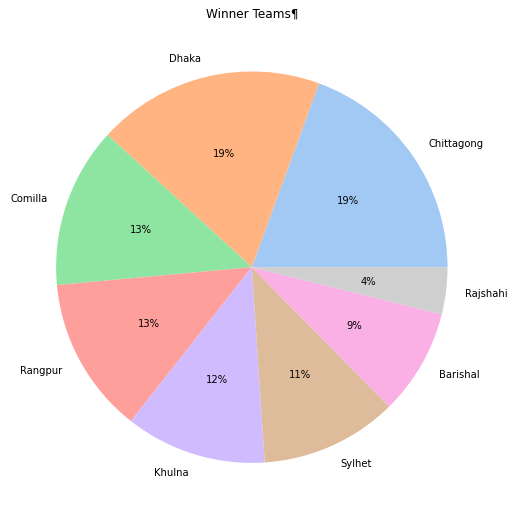

In [74]:
data = winner_teams
labels = winner_teams.keys()
plt.figure(figsize = (9, 9))
plt.title('Winner Teams¶')
colors = sns.color_palette('pastel')

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

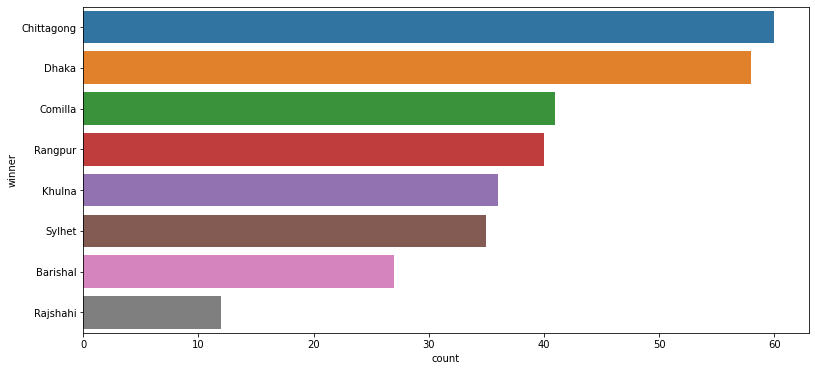

In [75]:
plt.figure(figsize = (13, 6))
sns.countplot(y = 'winner', data = bpl_winner, order = winner_teams.index)
plt.show()

### How many matches have been played in any session?

In [76]:
season_match = bpl['season'].value_counts()
season_match

2016/17    46
2012/13    46
2018/19    46
2019/20    46
2017/18    44
2015/16    33
2011/12    32
2021/22    18
Name: season, dtype: int64

### How many matches has a team won in a season?

In [77]:
winner_teams

Chittagong    60
Dhaka         58
Comilla       41
Rangpur       40
Khulna        36
Sylhet        35
Barishal      27
Rajshahi      12
Name: winner, dtype: int64

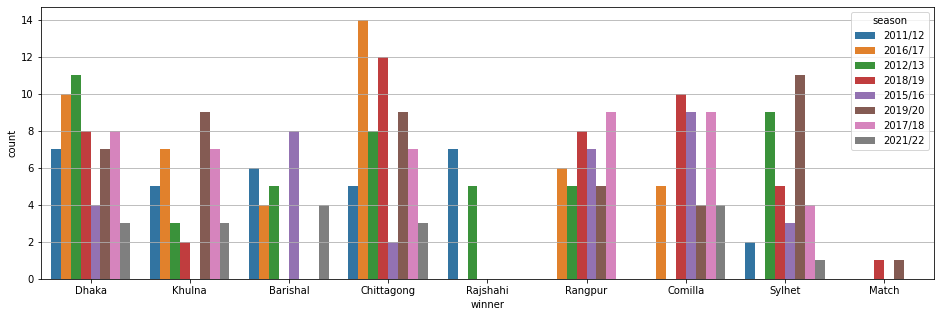

In [78]:
plt.figure(figsize = (16, 5))
sns.countplot(x = 'winner', data = bpl, hue = 'season')
plt.grid(axis = 'y')
plt.show()

In [79]:
bpl_winner.groupby('season')['winner'].value_counts()

season   winner    
2011/12  Dhaka          7
         Rajshahi       7
         Barishal       6
         Chittagong     5
         Khulna         5
         Sylhet         2
2012/13  Dhaka         11
         Sylhet         9
         Chittagong     8
         Barishal       5
         Rajshahi       5
         Rangpur        5
         Khulna         3
2015/16  Comilla        9
         Barishal       8
         Rangpur        7
         Dhaka          4
         Sylhet         3
         Chittagong     2
2016/17  Chittagong    14
         Dhaka         10
         Khulna         7
         Rangpur        6
         Comilla        5
         Barishal       4
2017/18  Comilla        9
         Rangpur        9
         Dhaka          8
         Chittagong     7
         Khulna         7
         Sylhet         4
2018/19  Chittagong    12
         Comilla       10
         Dhaka          8
         Rangpur        8
         Sylhet         5
         Khulna         2
2019/20  Sylhet   

In [80]:
s1 = bpl[bpl['season'] == '2011/12']['winner'].value_counts()
s1

Dhaka         7
Rajshahi      7
Barishal      6
Khulna        5
Chittagong    5
Sylhet        2
Name: winner, dtype: int64

### BPL Venues

In [81]:
venue_count = bpl['venue'].value_counts()
venue_count

Shere Bangla National Stadium, Mirpur        204
Zahur Ahmed Chowdhury Stadium, Chittagong     37
Zahur Ahmed Chowdhury Stadium, Chattogram     30
Sylhet International Cricket Stadium          22
MA Aziz Stadium, Chittagong                   10
Sheikh Abu Naser Stadium, Khulna               8
Name: venue, dtype: int64

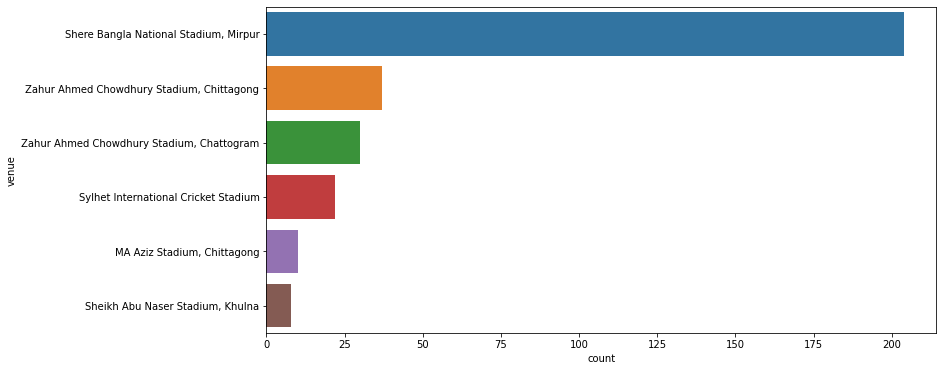

In [82]:
plt.figure(figsize = (12, 6))
sns.countplot(y = 'venue', data = bpl, order = venue_count.index)
plt.show()

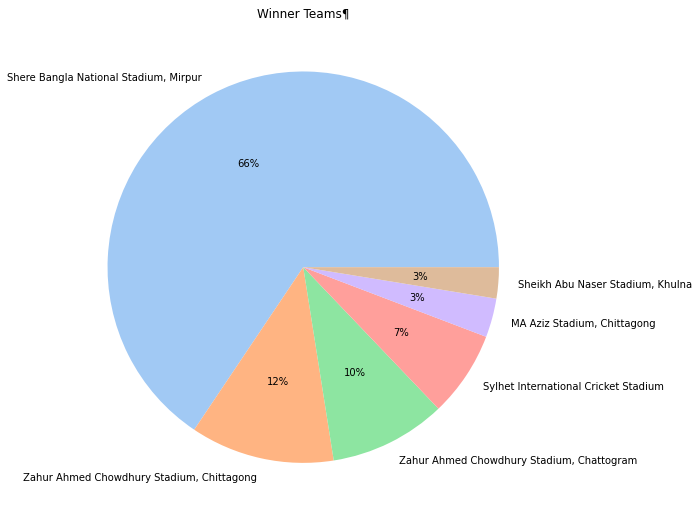

In [83]:
data = venue_count
labels = ['Shere Bangla National Stadium, Mirpur', 'Zahur Ahmed Chowdhury Stadium, Chittagong', 'Zahur Ahmed Chowdhury Stadium, Chattogram', 'Sylhet International Cricket Stadium', 'MA Aziz Stadium, Chittagong', 'Sheikh Abu Naser Stadium, Khulna']
plt.figure(figsize = (9, 9))
plt.title('Winner Teams¶')
colors = sns.color_palette('pastel')

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

### The top ten players who have been the most player of the match.

In [84]:
pom = bpl['player_of_match'].value_counts()[:10]
pom

Shakib Al Hasan    11
Mahmudullah         9
Shahid Afridi       7
Ravi Bopara         7
Mushfiqur Rahim     7
Chris Gayle         7
Tamim Iqbal         6
Evin Lewis          6
Andre Russell       6
Daren Sammy         5
Name: player_of_match, dtype: int64

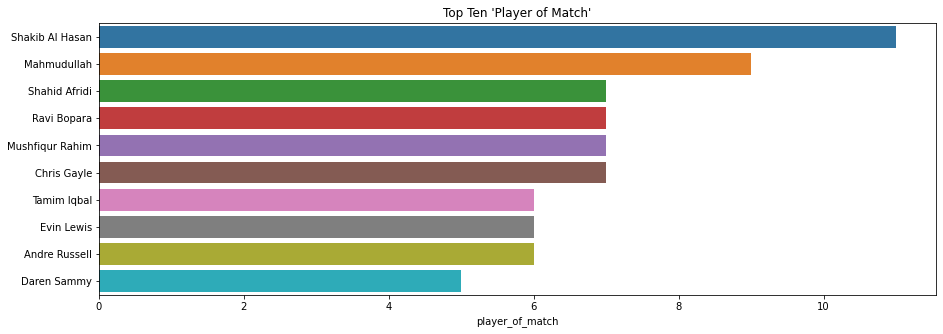

In [85]:
plt.figure(figsize = (15, 5))
plt.title("Top Ten 'Player of Match'")
sns.barplot(y = pom[:10].keys(), x = pom[:10])
plt.show()

### How many times has a team won the toss?

In [86]:
toss_won = bpl['toss_winner'].value_counts()
toss_won

Dhaka         46
Khulna        46
Rajshahi      42
Rangpur       40
Chittagong    39
Sylhet        35
Comilla       35
Barishal      28
Name: toss_winner, dtype: int64

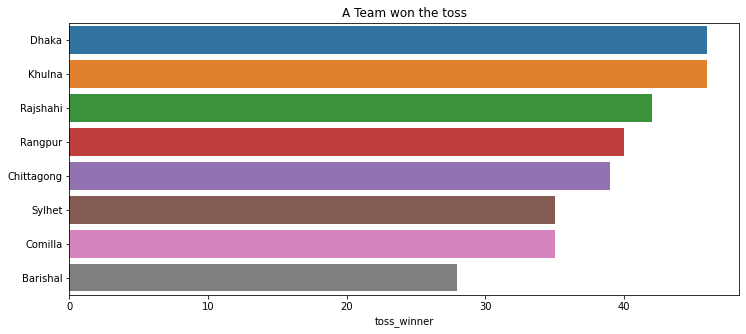

In [87]:
plt.figure(figsize = (12, 5))
plt.title("A Team won the toss")
sns.barplot(y = toss_won.keys(), x = toss_won)
plt.show()

### The top ten wicket takers player

In [88]:
bowler.head()

,id,season,match_no,date,player_name,O,M,R,W,ECON,WD,NB
0,0,2011/12,Final,Feb 29 2012,Mashrafe Mortaza,2.0,0,17,0,8.50,0,0
1,0,2011/12,Final,Feb 29 2012,Azhar Mahmood,2.0,0,25,0,12.50,0,1
2,32,2011/12,1st,Feb 10 2012,Yasir Arafat,4.0,0,33,2,8.25,2,0
3,29,2011/12,4th,Feb 11 2012,Syed Rasel,3.0,0,33,0,11.00,2,0
4,28,2011/12,5th,Feb 12 2012,Dwayne Bravo,4.0,0,34,1,8.50,3,1


In [89]:
top_bowlers = bowler.groupby(['player_name']).sum().sort_values('W', ascending=False)
top_bowlers.head(10)['W']

player_name
Shakib Al Hasan      116
Rubel Hossain         95
Mashrafe Mortaza      84
Taskin Ahmed          79
Shafiul Islam         78
Farhad Reza           68
Arafat Sunny          66
Kevon Cooper          63
Mustafizur Rahman     61
Mohammad Nabi         61
Name: W, dtype: int64

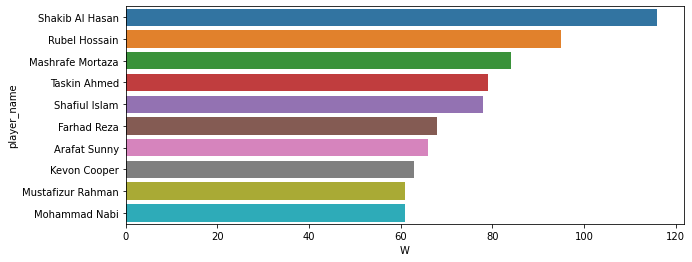

In [90]:
plt.figure(figsize= (10,4))
sns.barplot(x=top_bowlers.head(10)['W'], y=top_bowlers.head(10)['W'].keys())
plt.show()

### The top ten wicket takers bowler

### The top ten economical bowler¶

In [91]:
top_bowlers = bowler.groupby(['player_name']).sum().sort_values('ECON', ascending=False)
top_bowlers.head(10)['ECON']

player_name
Shafiul Islam       611.23
Farhad Reza         606.28
Mashrafe Mortaza    599.86
Rubel Hossain       572.92
Shakib Al Hasan     545.02
Arafat Sunny        496.35
Nazmul Islam        486.92
Al-Amin Hossain     475.77
Sohag Gazi          459.11
Taskin Ahmed        452.31
Name: ECON, dtype: float64

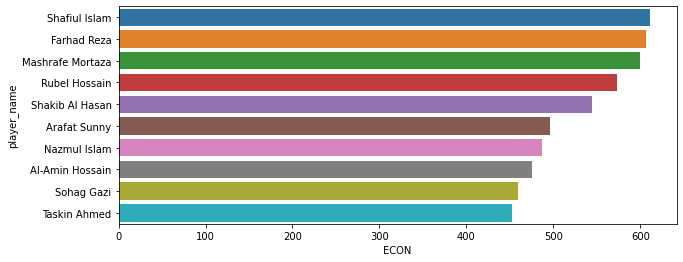

In [92]:
plt.figure(figsize= (10,4))
sns.barplot(x=top_bowlers.head(10)['ECON'], y=top_bowlers.head(10)['ECON'].keys())
plt.show()

### Top ten batsmen in terms of runs

In [93]:
top_batsmans = batsman.groupby(['player_name']).sum().sort_values('R', ascending=False)
top_batsmans.head(10)['R']

player_name
Tamim Iqbal        2483
Mushfiqur Rahim    2408
Mahmudullah        2014
Imrul Kayes        1909
Sabbir Rahman      1710
Anamul Haque       1676
Mohammad Mithun    1627
Shakib Al Hasan    1620
Chris Gayle        1599
Mominul Haque      1327
Name: R, dtype: int64

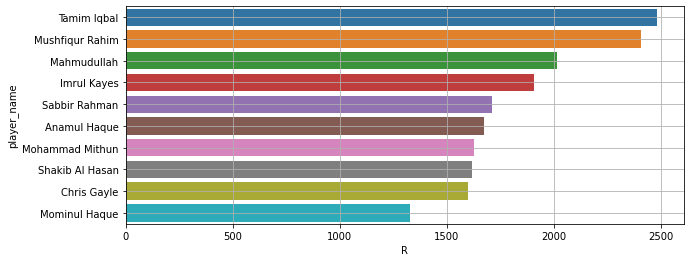

In [94]:
plt.figure(figsize= (10,4))
sns.barplot(x=top_batsmans.head(10)['R'], y=top_batsmans.head(10)['R'].keys())
plt.grid()
plt.show()

### Top ten batsmen top six

### Top ten batsmen top fours

### Top ten batsmen top strike rate

### The team that wins the toss and wins the match

In [95]:
TW_MW = bpl[bpl['toss_winner'] == bpl['winner']]['winner'].value_counts()
TW_MW

Dhaka         23
Khulna        19
Rangpur       19
Comilla       19
Chittagong    18
Barishal      15
Sylhet        15
Rajshahi       5
Name: winner, dtype: int64

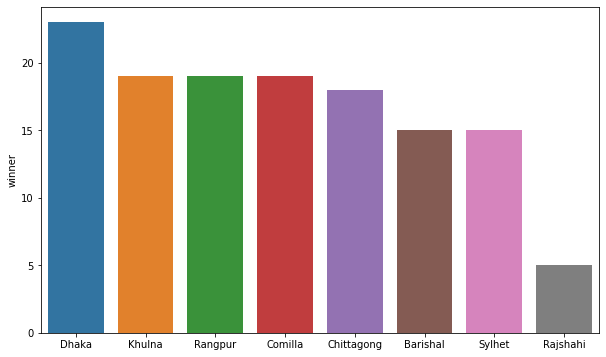

In [96]:
plt.figure(figsize = (10, 6))
sns.barplot(x = TW_MW.keys(), y = TW_MW)
plt.show()

### Won the toss, took the bat first and won the match

In [97]:
tw_bf_mw = bpl[(bpl['toss_decision'] == 'bat first') & (bpl['toss_winner'] == bpl['winner'])]['toss_winner'].value_counts()
tw_bf_mw

Dhaka         12
Khulna         6
Barishal       6
Rangpur        5
Rajshahi       4
Chittagong     3
Sylhet         3
Comilla        1
Name: toss_winner, dtype: int64

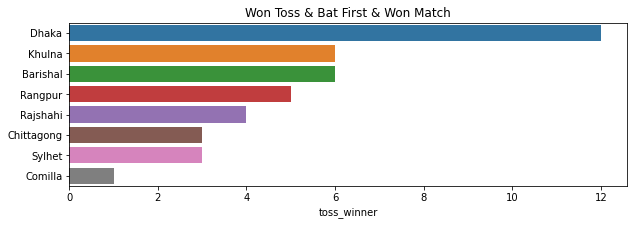

In [98]:
plt.figure(figsize = (10, 3))
plt.title('Won Toss & Bat First & Won Match')
sns.barplot(y = tw_bf_mw.keys(), x = tw_bf_mw)
plt.show()

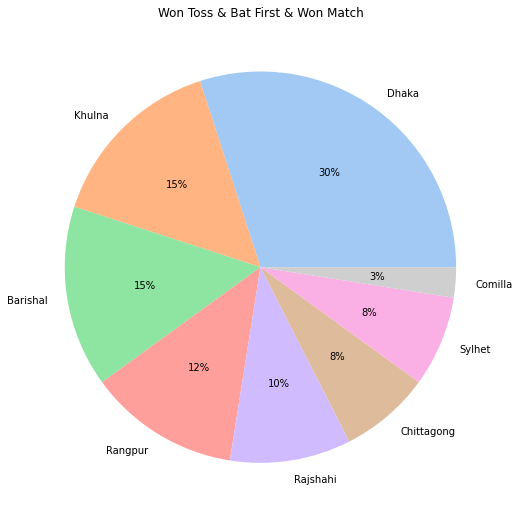

In [99]:
data = tw_bf_mw
labels = tw_bf_mw.keys()
plt.figure(figsize = (9, 9))
plt.title('Won Toss & Bat First & Won Match')
colors = sns.color_palette('pastel')

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

### Won the toss and match

In [100]:
won_T_M = bpl[bpl['toss_winner'] == bpl['winner']]['winner'].value_counts()
won_T_M

Dhaka         23
Khulna        19
Rangpur       19
Comilla       19
Chittagong    18
Barishal      15
Sylhet        15
Rajshahi       5
Name: winner, dtype: int64

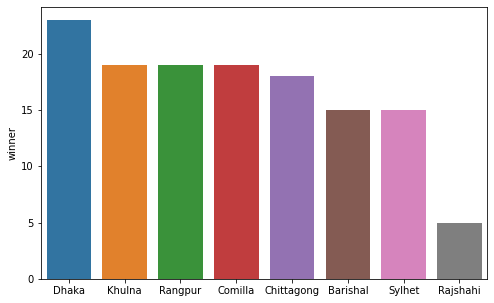

In [101]:
plt.figure(figsize = (8,5))
sns.barplot(x = won_T_M.keys(), y = won_T_M)
plt.show()

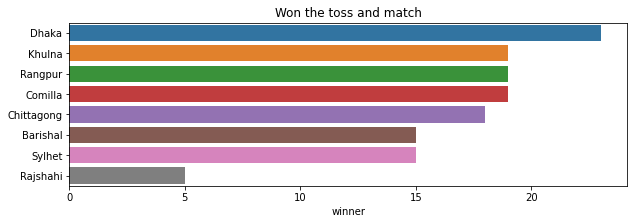

In [102]:
plt.figure(figsize = (10, 3))
plt.title('Won the toss and match')
sns.barplot(y = won_T_M.keys(), x = won_T_M)
plt.show()

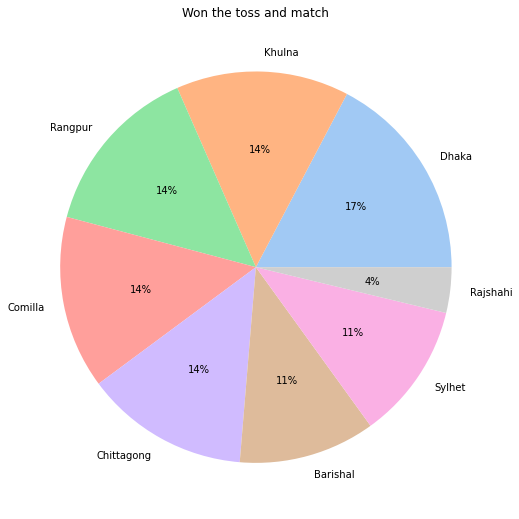

In [103]:
data = won_T_M
labels = won_T_M.keys()
plt.figure(figsize = (9, 9))
plt.title('Won the toss and match')
colors = sns.color_palette('pastel')

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

### Won the toss and took the bat first

In [104]:
won_T_BF = bpl[(bpl['toss_decision'] == 'bat first') & (bpl['toss_winner'] == bpl['winner'])]['toss_winner'].value_counts()
won_T_BF

Dhaka         12
Khulna         6
Barishal       6
Rangpur        5
Rajshahi       4
Chittagong     3
Sylhet         3
Comilla        1
Name: toss_winner, dtype: int64

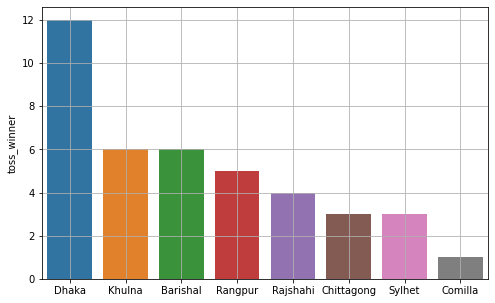

In [105]:
plt.figure(figsize = (8,5))
sns.barplot(x = won_T_BF.keys(), y = won_T_BF)
plt.grid()
plt.show()

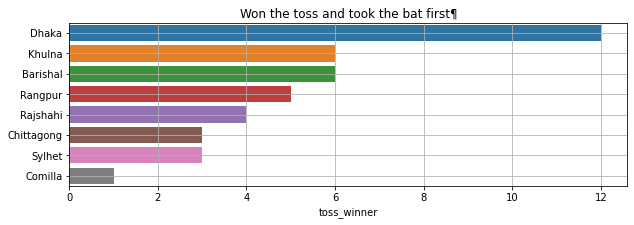

In [106]:
plt.figure(figsize = (10, 3))
plt.title('Won the toss and took the bat first¶')
sns.barplot(y = won_T_BF.keys(), x = won_T_BF)
plt.grid()
plt.show()

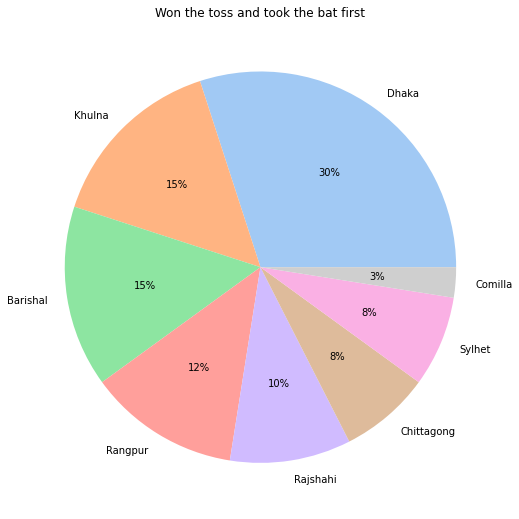

In [107]:
data = won_T_BF
labels = ['Dhaka ', 'Khulna', 'Barishal', 'Rangpur', 'Rajshahi', 'Chittagong','Sylhet', 'Comilla']
plt.figure(figsize = (9, 9))
plt.title('Won the toss and took the bat first')
colors = sns.color_palette('pastel')

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

### Toss winner and field  first

In [108]:
T_W_F_F = bpl[(bpl['toss_decision'] == 'field first') & (bpl['toss_winner'] == bpl['winner'])]['toss_winner'].value_counts()
T_W_F_F

Comilla       18
Chittagong    15
Rangpur       14
Khulna        13
Sylhet        12
Dhaka         11
Barishal       9
Rajshahi       1
Name: toss_winner, dtype: int64

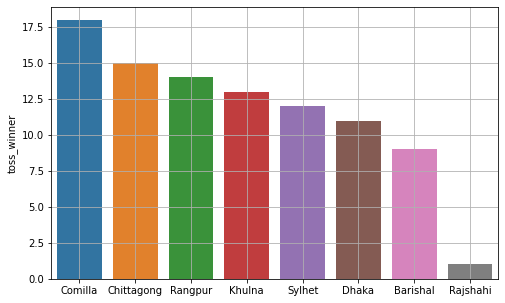

In [109]:
plt.figure(figsize = (8,5))
sns.barplot(x = T_W_F_F.keys(), y = T_W_F_F)
plt.grid()
plt.show()

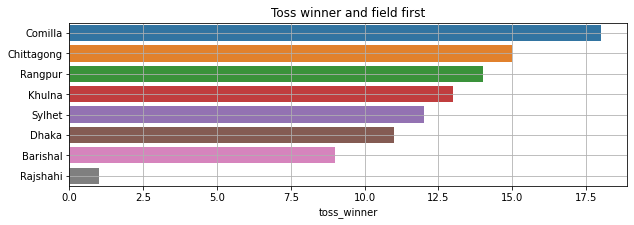

In [110]:
plt.figure(figsize = (10, 3))
plt.title('Toss winner and field first')
sns.barplot(y = T_W_F_F.keys(), x = T_W_F_F)
plt.grid()
plt.show()

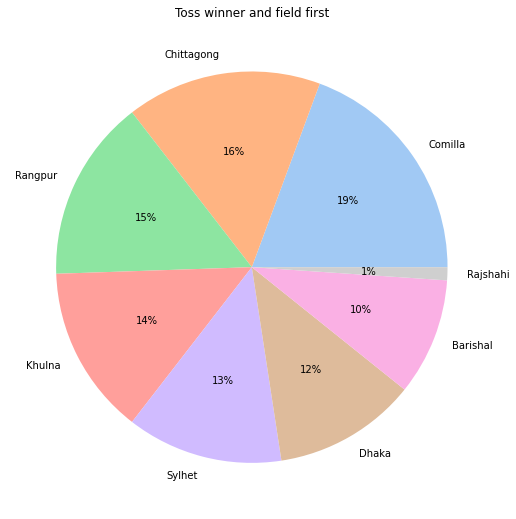

In [111]:
data = T_W_F_F
labels = ['Comilla', 'Chittagong', 'Rangpur', 'Khulna','Sylhet', 'Dhaka ', 'Barishal', 'Rajshahi']
plt.figure(figsize = (9, 9))
plt.title('Toss winner and field first')
colors = sns.color_palette('pastel')

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

### Bat first and won the match

In [112]:
Bf_Wm = bpl[(bpl['toss_decision'] == 'bat first') | (bpl['toss_decision'] == 'field first') & (bpl['toss_winner'] != bpl['winner'])]['winner'].value_counts()
Bf_Wm

Dhaka         47
Chittagong    45
Rangpur       26
Khulna        23
Comilla       23
Sylhet        23
Barishal      18
Rajshahi      11
Match          2
Name: winner, dtype: int64

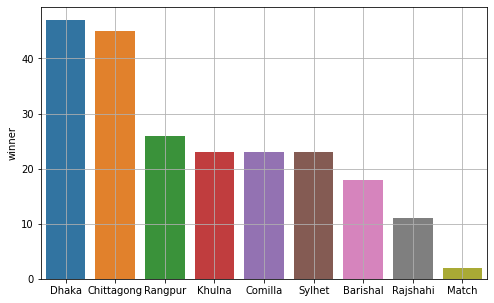

In [113]:
plt.figure(figsize = (8,5))
sns.barplot(x = Bf_Wm.keys(), y = Bf_Wm)
plt.grid()
plt.show()

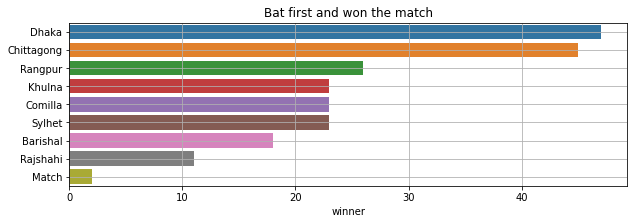

In [114]:
plt.figure(figsize = (10, 3))
plt.title('Bat first and won the match')
sns.barplot(y = Bf_Wm.keys(), x = Bf_Wm)
plt.grid()
plt.show()

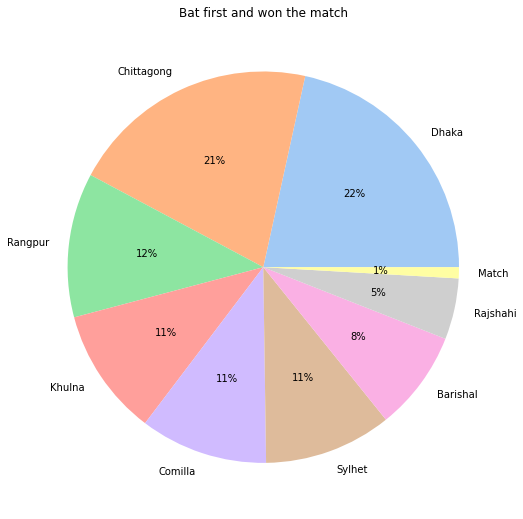

In [115]:
data = Bf_Wm
labels = ['Dhaka', 'Chittagong', 'Rangpur', 'Khulna', 'Comilla','Sylhet',  'Barishal', 'Rajshahi', 'Match']
plt.figure(figsize = (9, 9))
plt.title('Bat first and won the match')
colors = sns.color_palette('pastel')

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

### Number of Matches Winner

In [116]:
matches_number_winner =  bpl[bpl.winner != 'Nan'].winner.value_counts()
matches_number_winner

Chittagong    60
Dhaka         58
Comilla       41
Rangpur       40
Khulna        36
Sylhet        35
Barishal      27
Rajshahi      12
Match          2
Name: winner, dtype: int64

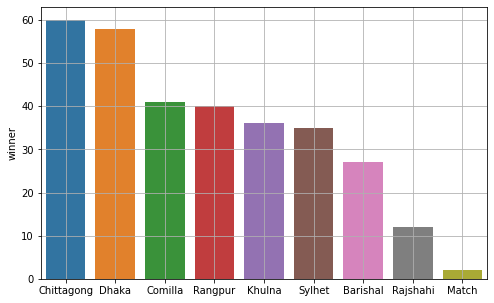

In [117]:
plt.figure(figsize = (8,5))
sns.barplot(x = matches_number_winner.keys(), y = matches_number_winner)
plt.grid()
plt.show()

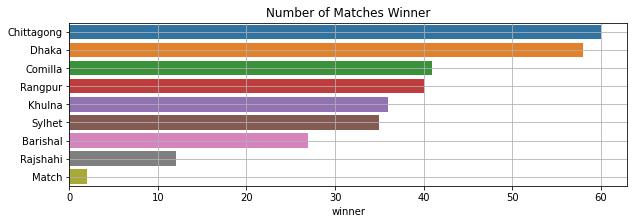

In [118]:
plt.figure(figsize = (10, 3))
plt.title('Number of Matches Winner')
sns.barplot(y = matches_number_winner.keys(), x = matches_number_winner)
plt.grid()
plt.show()

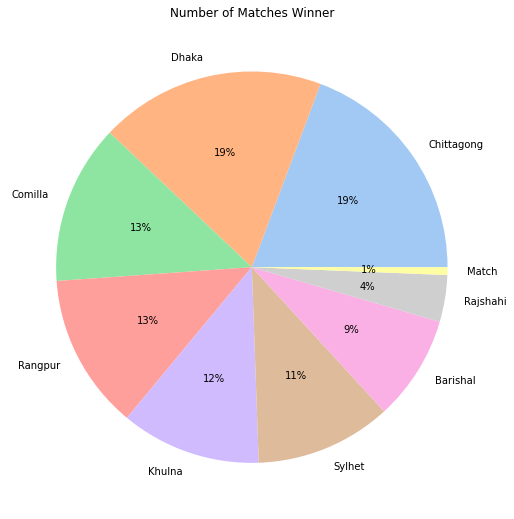

In [119]:
data = matches_number_winner
labels = ['Chittagong', 'Dhaka', 'Comilla', 'Rangpur', 'Khulna','Sylhet',  'Barishal', 'Rajshahi', 'Match']
plt.figure(figsize = (9, 9))
plt.title('Number of Matches Winner')
colors = sns.color_palette('pastel')

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [120]:
field_winner = matches_number_winner.sum() - Bf_Wm.sum()
print(f'All matches {matches_number_winner.sum()} \nbat first and won {Bf_Wm.sum()} \nfield first and won {field_winner}')

All matches 311 
bat first and won 218 
field first and won 93


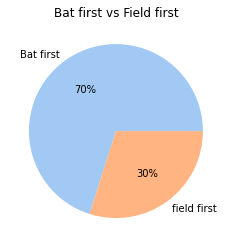

In [121]:
data = [Bf_Wm.sum(), field_winner]
labels = ['Bat first', 'field first']
plt.title('Bat first vs Field first')
colors = sns.color_palette('pastel')

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

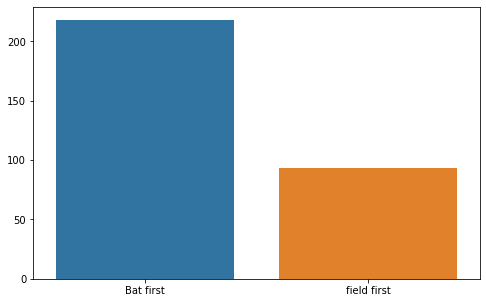

In [122]:
plt.figure(figsize = (8,5))
sns.barplot(y=data, x=labels)
plt.show()